# Install Requirements

In [1]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install dateparser

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install jovian

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


# Import all

In [1]:
import re
import matplotlib.pyplot as plot
import pandas as pd
import numpy as np
import seaborn as sns
import calendar
import datetime as dt
from wordcloud import WordCloud,STOPWORDS
import emoji
from sklearn.feature_extraction.text import CountVectorizer
import random
from textblob import TextBlob
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [2]:
sns.set(rc={'figure.figsize':(14,6)})

# Data Collecting and preprocessing

In [3]:
def startswithDate(s):
    pattern='^([0-2][0-9]|(3)[0-1])(\/)(((0)[0-9])|((1)[0-2]))(\/)(\d{2}|\d{4}), ([0-9][0-9]):([0-9][0-9]) -'
    result=re.match(pattern,s)
    if result:
        return True
    return False

In [4]:
def startswithAuthor(s):
    patterns=['([\w]+):', # First Name
              '([\w]+[\s]+[\w]+):', # First Name + Last Name
             '([\w]+[\s]+[\w]+[\s]+[\w]+):',  # First Name+ Middle Name + Last Name
             '^(\+\d{1,2}\s)?\(?\d{3}\) ((\(\d{3}\) ?)|(\d{3}-))?\d{3}-\d{4}:',  #Mobile Number(US)
             '([+]\d{2} \d{4} \d{6}):',  # Mobile Number (Europe)
           '([+]\d{3} \d{3} \d{6})'  # Mobile Number (Uganda)
             ]
    pattern='^'+'|'.join(patterns)
    result=re.match(pattern,s)
    if result:
        return True
    return False

In [5]:
def getDataPoint(line):
    splitLine=line.split(' - ') #splitLine=['18/06/2021, 22:47','Loki: Why do you have two numbers, Arsalan?']
    dateTime=splitLine[0] # '18/06/2021, 22:47'
    message=' '.join(splitLine[1:]) #'Loki: Why do you have two numbers, Arsalan?'
    if startswithAuthor(message): #True
        splitmessage=message.split(': ') #splitmessage=['Loki','Why do you have two numbers, Arsalan?']
        author=splitmessage[0] #author='Loki'
        message=" ".join(splitmessage[1:]) # message='Why do you have two numbers, Arsalan?''
    else:
        author=None
    return dateTime,author,message

In [6]:
parsedChat=[]
convoPath='chat.txt'
with open(convoPath,encoding='utf-8') as fp:
    fp.readline
    messagebuffer=[]
    dateTime,author=None,None
    
    while True:
        line=fp.readline()
        if not line:
            break
        line=line.strip()
        if startswithDate(line):
            if len(messagebuffer)>0:
                parsedChat.append([dateTime,author," ".join(messagebuffer)])
                messagebuffer.clear()
                dateTime,author,message=getDataPoint(line)
                messagebuffer.append(message)
            else:
                messagebuffer.append(line)

In [7]:
parsedChat

[[None, None, '10/10/21, 06:29 - Nandha gect: Gud mrng'],
 ['10/10/21, 06:30', 'Nandha gect', '<Media omitted>'],
 ['10/10/21, 06:34', 'Ayisha gect', '👍🏻'],
 ['10/10/21, 06:43', 'Nivya gect', '👍🏼'],
 ['10/10/21, 07:31', 'Sumayya gect', 'Mm'],
 ['10/10/21, 08:55', None, 'Akku mol Gect🥂: 👍🏻'],
 ['10/10/21, 09:02', 'Sumayya gect', 'Open aavunnillallo'],
 ['10/10/21, 09:02', 'Sajana gect', 'Illyaa'],
 ['10/10/21, 09:03', None, 'Praveena mottachii🥚: Aayallo'],
 ['10/10/21, 09:03', 'Sumayya gect', 'No'],
 ['10/10/21, 09:03', None, 'Praveena mottachii🥚: Classroomil'],
 ['10/10/21, 09:03', 'Sumayya gect', 'Browser open aavunnilla'],
 ['10/10/21, 09:03', 'Sumayya gect', '<Media omitted>'],
 ['10/10/21, 09:05', 'Sajana gect', 'Inganee nikkaalo'],
 ['10/10/21, 09:05', 'Sajana gect', '<Media omitted>'],
 ['10/10/21, 09:05', 'Sumayya gect', 'Aa enikkum'],
 ['10/10/21, 09:05', 'Sumayya gect', 'Permission kittunnilla'],
 ['10/10/21, 09:09', 'Sumayya gect', 'Kittyo'],
 ['10/10/21, 09:09',
  'Sumayya g

In [8]:
df=pd.DataFrame(parsedChat,columns=['DateTime','Author','Message'])

In [9]:
df.head()

,DateTime,Author,Message
0,None,None,"10/10/21, 06:29 - Nandha gect: Gud mrng"
1,"10/10/21, 06:30",Nandha gect,<Media omitted>
2,"10/10/21, 06:34",Ayisha gect,👍🏻
3,"10/10/21, 06:43",Nivya gect,👍🏼
4,"10/10/21, 07:31",Sumayya gect,Mm


In [10]:
df.tail()

,DateTime,Author,Message
165,"12/12/21, 15:47",Nandha gect,Please join your DAA classroom using code :sc2...
166,"12/12/21, 20:15",Niya gect,<Media omitted>
167,"12/12/21, 20:15",Niya gect,<Media omitted>
168,"12/12/21, 20:15",Niya gect,<Media omitted>
169,"12/12/21, 20:15",Niya gect,<Media omitted>


In [11]:
df.describe()

,DateTime,Author,Message
count,169,124,170
unique,74,16,113
top,"10/10/21, 10:36",Sumayya gect,<Media omitted>
freq,12,40,24


In [12]:
# No. of images, images are represented by <Media omitted>
media=df[df['Message']=='<Media omitted>']

In [13]:
author_media_messages_value_counts=media['Author'].value_counts()
top10_author_media_messages_value_counts=author_media_messages_value_counts.head(10)

Text(0.5, 1.0, 'Most Media Items sent per Author')

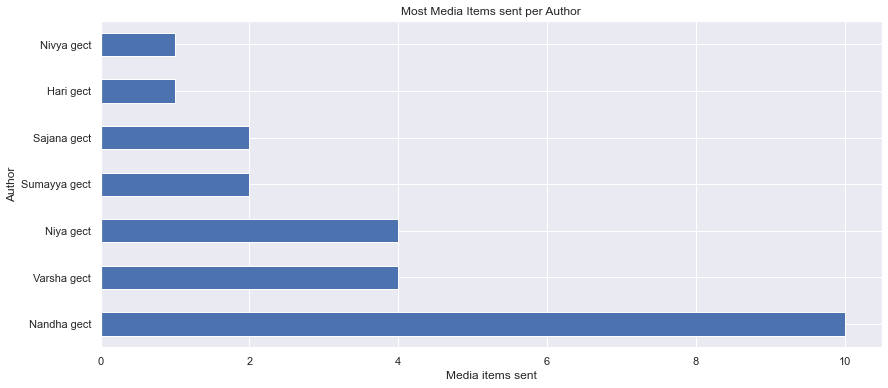

In [14]:
top10_author_media_messages_value_counts.plot.barh()
plot.ylabel('Author')
plot.xlabel('Media items sent')
plot.title('Most Media Items sent per Author')

In [15]:
total_messages = df.shape[0]
print(total_messages)

170


In [16]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
print(media_messages)

24


In [17]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()

In [18]:
links = np.sum(df.urlcount)

In [19]:
print("Group Wise Stats")
print("Messages:",total_messages)
print("Media:",media_messages)
print("Links:",links)

Group Wise Stats
Messages: 170
Media: 24
Links: 1


In [20]:
## Let us Separate the media messages and text messages
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 165
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  145 non-null    object
 1   Author    100 non-null    object
 2   Message   146 non-null    object
 3   urlcount  146 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 5.7+ KB


In [21]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['WordCount'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

In [22]:
messages_df.head(2)

,DateTime,Author,Message,urlcount,Letter_Count,WordCount,MessageCount
0,None,None,"10/10/21, 06:29 - Nandha gect: Gud mrng",0,39,7,1
2,"10/10/21, 06:34",Ayisha gect,👍🏻,0,2,1,1


Text(0.5, 1.0, 'Most Media Items sent per Author')

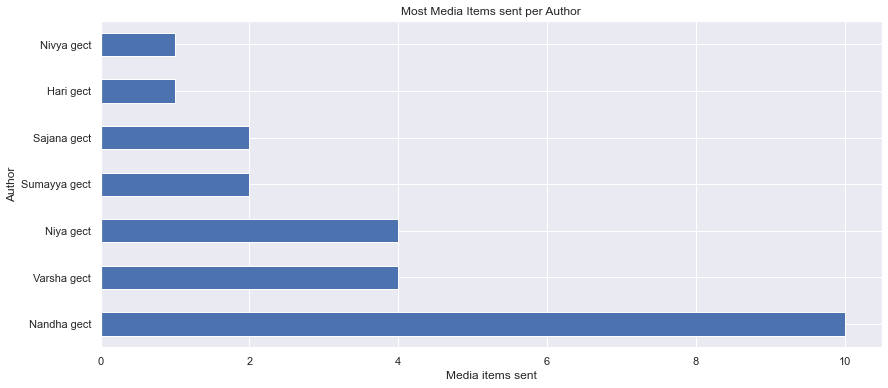

In [30]:
top10_author_media_messages_value_counts.plot.barh()
plot.ylabel('Author')
plot.xlabel('Media items sent')
plot.title('Most Media Items sent per Author')

In [32]:
message_deleted=df[df['Message']=='This message was deleted']

In [35]:
message_deleted

,DateTime,Author,Message,urlcount
43,"10/10/21, 09:51",Varsha gect,This message was deleted,0


In [36]:
author_messages_deleted_value_counts=message_deleted['Author'].value_counts()

In [37]:
author_messages_deleted_value_counts

Varsha gect    1
Name: Author, dtype: int64

In [38]:
top10_aithor_messages_deleted_value_counts=author_messages_deleted_value_counts.head(10)

Text(0.5, 0, 'Message Deleted')

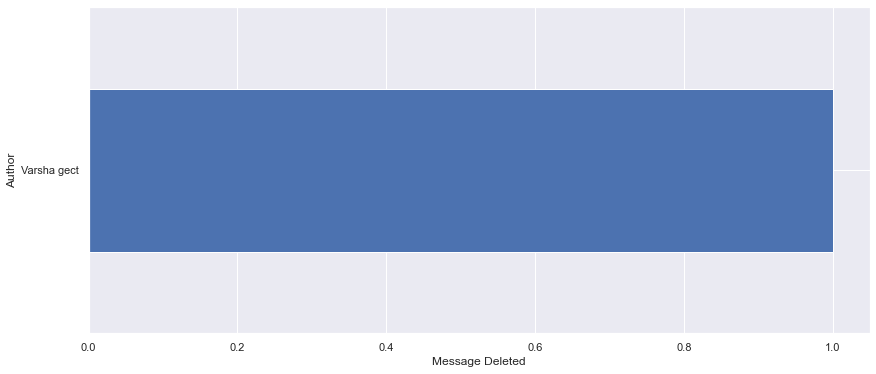

In [39]:
import matplotlib.pyplot as plt
top10_aithor_messages_deleted_value_counts.plot.barh()
plt.ylabel('Author')
plt.xlabel('Message Deleted')

In [40]:
#Number of Group Notifications
grp_notif=df[df['Author']=='grp_notif']

In [41]:
grp_notif.shape

(0, 4)

In [43]:
df.isnull().sum()

DateTime     1
Author      46
Message      0
urlcount     0
dtype: int64

In [44]:
df=df.dropna()

In [45]:
df.shape

(124, 4)

In [46]:
df.reset_index(inplace=True,drop=True)

Add the dateTime object from dateTime column

In [48]:
df['dateTime']=pd.to_datetime(df['DateTime'],infer_datetime_format=True)

In [50]:
df['Day of Week']=pd.Series(pd.Categorical(df['dateTime'].dt.day_name(),categories=list(calendar.day_name)))

In [51]:
df['Day of Week']

0      Sunday
1      Sunday
2      Sunday
3      Sunday
4      Sunday
        ...  
119    Sunday
120    Sunday
121    Sunday
122    Sunday
123    Sunday
Name: Day of Week, Length: 124, dtype: category
Categories (7, object): ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [52]:
df['Hour']=pd.Series(pd.Categorical(df['dateTime'].dt.hour))

In [53]:
df['Hour']

0       6
1       6
2       6
3       7
4       9
       ..
119    15
120    20
121    20
122    20
123    20
Name: Hour, Length: 124, dtype: category
Categories (12, int64): [6, 7, 9, 10, ..., 19, 20, 21, 22]

In [54]:
df=df.set_index('dateTime')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 124 entries, 2021-10-10 06:30:00 to 2021-12-12 20:15:00
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   DateTime     124 non-null    object  
 1   Author       124 non-null    object  
 2   Message      124 non-null    object  
 3   urlcount     124 non-null    int64   
 4   Day of Week  124 non-null    category
 5   Hour         124 non-null    category
dtypes: category(2), int64(1), object(3)
memory usage: 5.8+ KB


In [56]:
df.head()


,DateTime,Author,Message,urlcount,Day of Week,Hour
dateTime,,,,,,
2021-10-10 06:30:00,"10/10/21, 06:30",Nandha gect,<Media omitted>,0,Sunday,6
2021-10-10 06:34:00,"10/10/21, 06:34",Ayisha gect,👍🏻,0,Sunday,6
2021-10-10 06:43:00,"10/10/21, 06:43",Nivya gect,👍🏼,0,Sunday,6
2021-10-10 07:31:00,"10/10/21, 07:31",Sumayya gect,Mm,0,Sunday,7
2021-10-10 09:02:00,"10/10/21, 09:02",Sumayya gect,Open aavunnillallo,0,Sunday,9


In [57]:
df.describe()

,urlcount
count,124.000000
mean,0.008065
std,0.089803
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [58]:
author_value_counts=df['Author'].value_counts()
top10_talkers=author_value_counts.head(10)

In [59]:
top10_talkers

Sumayya gect    40
Nandha gect     16
Ayisha gect     11
Sajana gect     11
Varsha gect     11
Niya gect        8
Hari gect        6
Aneena gect      5
Nivya gect       3
Suppu gect       3
Name: Author, dtype: int64

Text(0.5, 1.0, 'The top 10 Most Talkatie Persons')

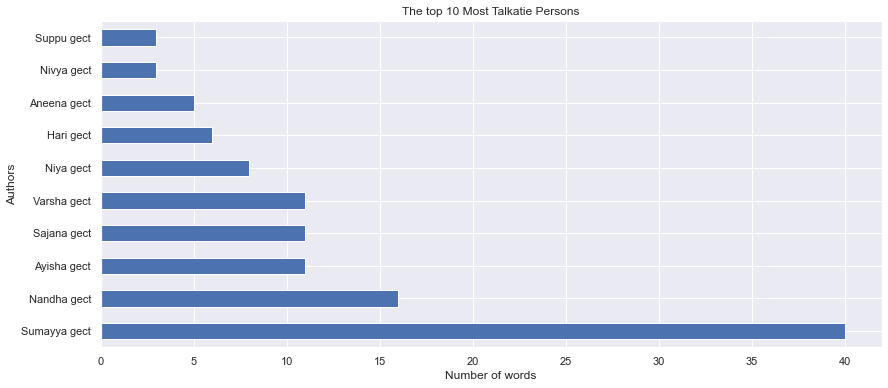

In [60]:
top10_talkers.plot.barh()
plt.xlabel('Number of words')
plt.ylabel('Authors')
plt.title('The top 10 Most Talkatie Persons')

In [61]:
df

,DateTime,Author,Message,urlcount,Day of Week,Hour
dateTime,,,,,,
2021-10-10 06:30:00,"10/10/21, 06:30",Nandha gect,<Media omitted>,0,Sunday,6
2021-10-10 06:34:00,"10/10/21, 06:34",Ayisha gect,👍🏻,0,Sunday,6
2021-10-10 06:43:00,"10/10/21, 06:43",Nivya gect,👍🏼,0,Sunday,6
2021-10-10 07:31:00,"10/10/21, 07:31",Sumayya gect,Mm,0,Sunday,7
2021-10-10 09:02:00,"10/10/21, 09:02",Sumayya gect,Open aavunnillallo,0,Sunday,9
...,...,...,...,...,...,...
2021-12-12 15:47:00,"12/12/21, 15:47",Nandha gect,Please join your DAA classroom using code :sc2...,0,Sunday,15
2021-12-12 20:15:00,"12/12/21, 20:15",Niya gect,<Media omitted>,0,Sunday,20
2021-12-12 20:15:00,"12/12/21, 20:15",Niya gect,<Media omitted>,0,Sunday,20


In [62]:
df['Date']=df['DateTime'].apply(lambda t:t.split(',')[0])

In [63]:
df['Date']

dateTime
2021-10-10 06:30:00    10/10/21
2021-10-10 06:34:00    10/10/21
2021-10-10 06:43:00    10/10/21
2021-10-10 07:31:00    10/10/21
2021-10-10 09:02:00    10/10/21
                         ...   
2021-12-12 15:47:00    12/12/21
2021-12-12 20:15:00    12/12/21
2021-12-12 20:15:00    12/12/21
2021-12-12 20:15:00    12/12/21
2021-12-12 20:15:00    12/12/21
Name: Date, Length: 124, dtype: object

Text(0, 0.5, 'Number of messages')

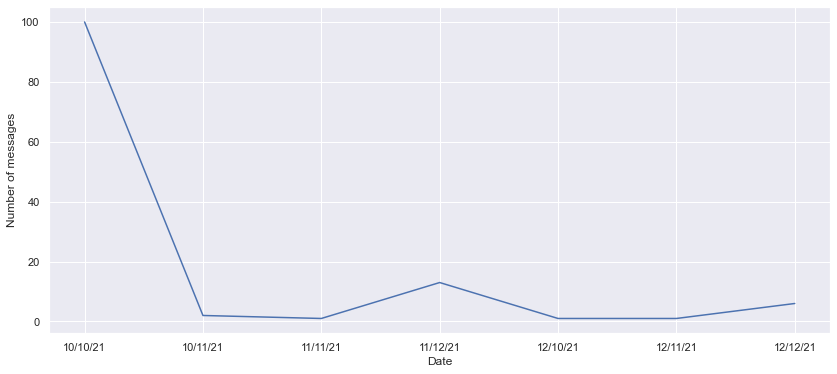

In [64]:
df.groupby('Date')['Message'].count().plot()
plt.ylabel('Number of messages')

In [65]:
df['Time']=df['DateTime'].apply(lambda t: t.split(',')[1])

In [66]:
df['Time']

dateTime
2021-10-10 06:30:00     06:30
2021-10-10 06:34:00     06:34
2021-10-10 06:43:00     06:43
2021-10-10 07:31:00     07:31
2021-10-10 09:02:00     09:02
                        ...  
2021-12-12 15:47:00     15:47
2021-12-12 20:15:00     20:15
2021-12-12 20:15:00     20:15
2021-12-12 20:15:00     20:15
2021-12-12 20:15:00     20:15
Name: Time, Length: 124, dtype: object

Text(0, 0.5, 'Number of messages')

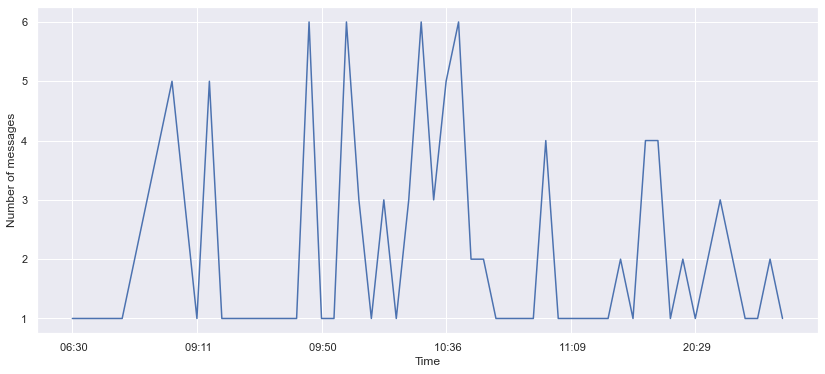

In [67]:
df.groupby('Time')['Message'].count().plot()
plt.ylabel('Number of messages')

Text(0, 0.5, 'Number of messages')

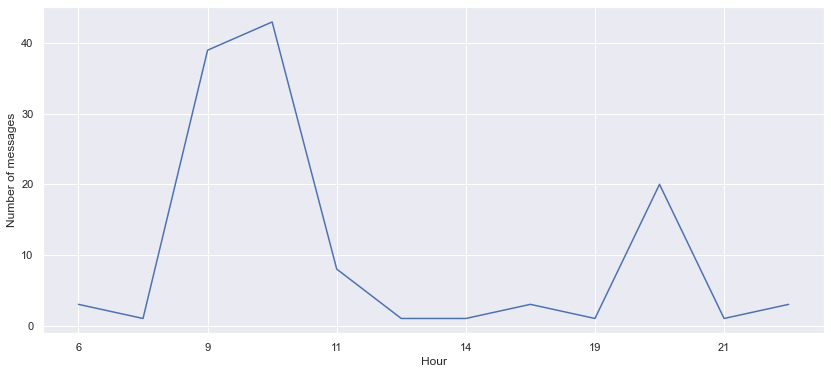

In [68]:
df.groupby('Hour')['Message'].count().plot()
plt.ylabel('Number of messages')

In [69]:
df['Letter Count']=df['Message'].apply(lambda s: len(s))

In [70]:
df['Letter Count']

dateTime
2021-10-10 06:30:00    15
2021-10-10 06:34:00     2
2021-10-10 06:43:00     2
2021-10-10 07:31:00     2
2021-10-10 09:02:00    18
                       ..
2021-12-12 15:47:00    50
2021-12-12 20:15:00    15
2021-12-12 20:15:00    15
2021-12-12 20:15:00    15
2021-12-12 20:15:00    15
Name: Letter Count, Length: 124, dtype: int64

In [71]:
len('asdas')

5

In [72]:
df['Word Count']=df['Message'].apply(lambda s: len(s.split(' ')))
df['Word Count']

dateTime
2021-10-10 06:30:00    2
2021-10-10 06:34:00    1
2021-10-10 06:43:00    1
2021-10-10 07:31:00    1
2021-10-10 09:02:00    2
                      ..
2021-12-12 15:47:00    8
2021-12-12 20:15:00    2
2021-12-12 20:15:00    2
2021-12-12 20:15:00    2
2021-12-12 20:15:00    2
Name: Word Count, Length: 124, dtype: int64

In [73]:
df['Message']

dateTime
2021-10-10 06:30:00                                      <Media omitted>
2021-10-10 06:34:00                                                   👍🏻
2021-10-10 06:43:00                                                   👍🏼
2021-10-10 07:31:00                                                   Mm
2021-10-10 09:02:00                                   Open aavunnillallo
                                             ...                        
2021-12-12 15:47:00    Please join your DAA classroom using code :sc2...
2021-12-12 20:15:00                                      <Media omitted>
2021-12-12 20:15:00                                      <Media omitted>
2021-12-12 20:15:00                                      <Media omitted>
2021-12-12 20:15:00                                      <Media omitted>
Name: Message, Length: 124, dtype: object

In [74]:
df

,DateTime,Author,Message,urlcount,Day of Week,Hour,Date,Time,Letter Count,Word Count
dateTime,,,,,,,,,,
2021-10-10 06:30:00,"10/10/21, 06:30",Nandha gect,<Media omitted>,0,Sunday,6,10/10/21,06:30,15,2
2021-10-10 06:34:00,"10/10/21, 06:34",Ayisha gect,👍🏻,0,Sunday,6,10/10/21,06:34,2,1
2021-10-10 06:43:00,"10/10/21, 06:43",Nivya gect,👍🏼,0,Sunday,6,10/10/21,06:43,2,1
2021-10-10 07:31:00,"10/10/21, 07:31",Sumayya gect,Mm,0,Sunday,7,10/10/21,07:31,2,1
2021-10-10 09:02:00,"10/10/21, 09:02",Sumayya gect,Open aavunnillallo,0,Sunday,9,10/10/21,09:02,18,2
...,...,...,...,...,...,...,...,...,...,...
2021-12-12 15:47:00,"12/12/21, 15:47",Nandha gect,Please join your DAA classroom using code :sc2...,0,Sunday,15,12/12/21,15:47,50,8
2021-12-12 20:15:00,"12/12/21, 20:15",Niya gect,<Media omitted>,0,Sunday,20,12/12/21,20:15,15,2
2021-12-12 20:15:00,"12/12/21, 20:15",Niya gect,<Media omitted>,0,Sunday,20,12/12/21,20:15,15,2


In [75]:
print('Total Letter Count in the group:'+str(df['Letter Count'].sum()))

Total Letter Count in the group:1565


In [76]:
print('Total Word Count in the group:'+str(df['Word Count'].sum()))

Total Word Count in the group:265


# ###What is the most common number of words in a message?

Text(0, 0.5, 'Frequency')

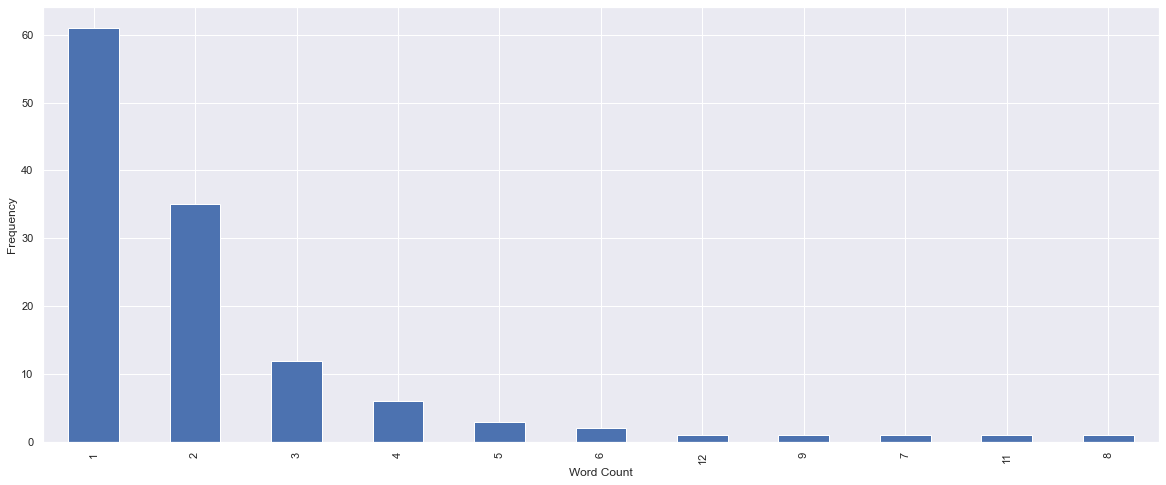

In [79]:
plt.figure(figsize=(20,8))
word_count_value_counts=df['Word Count'].value_counts()
top30_word_count=word_count_value_counts.head(30)
top30_word_count.plot.bar()
plt.xlabel('Word Count')
plt.ylabel('Frequency')

In [80]:
## Summary by user
users=df.groupby('Author')['Author'].count()
print(users)

Author
Aneena gect          5
Anjana gect          2
Ayisha gect         11
Hari gect            6
Jerin gect           1
Nandha gect         16
Nivya gect           3
Niya gect            8
Sajana gect         11
Sanika gect          1
Shahma gect          2
Sreekiran gect       3
Sreelakshmi gect     1
Sumayya gect        40
Suppu gect           3
Varsha gect         11
Name: Author, dtype: int64


#### So who exactly writes the most letters?

In [81]:
total_letter_count_by_author=df[['Author','Letter Count']].groupby('Author').sum()

In [82]:
sorted_total_letter_count_by_author=total_letter_count_by_author.sort_values('Letter Count',ascending=False)
top10_sorted_total_letter_grouped_by_author=sorted_total_letter_count_by_author.head(10)

Text(0, 0.5, 'Authors')

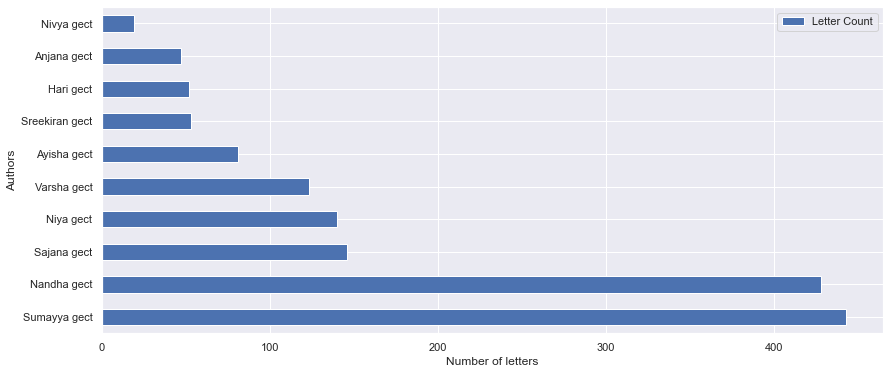

In [83]:
top10_sorted_total_letter_grouped_by_author.plot.barh()
plt.xlabel('Number of letters')
plt.ylabel('Authors')

Text(0, 0.5, 'Authors')

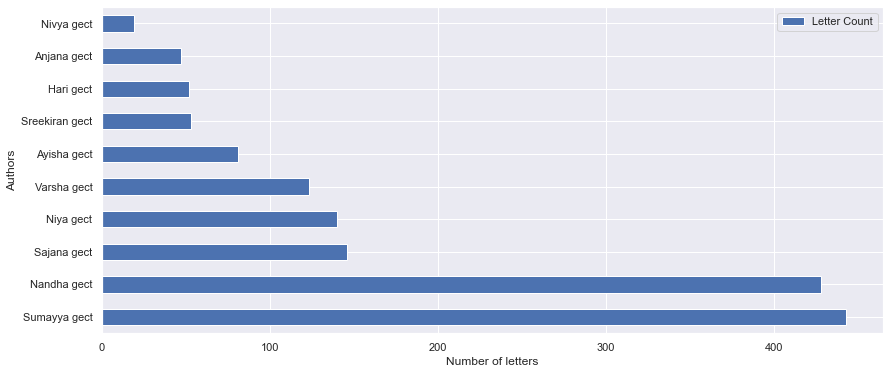

In [84]:
top10_sorted_total_letter_grouped_by_author.plot.barh()
plt.xlabel('Number of letters')
plt.ylabel('Authors')

Text(0, 0.5, 'Authors')

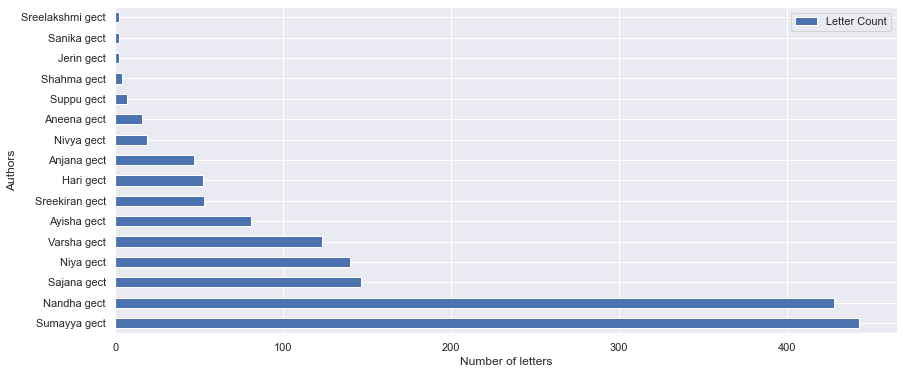

In [85]:
total_letter_count_by_author=df[['Author','Letter Count']].groupby('Author').sum()
sorted_total_letter_count_by_author=total_letter_count_by_author.sort_values('Letter Count',ascending=False)
sorted_total_letter_grouped_by_author=sorted_total_letter_count_by_author
sorted_total_letter_grouped_by_author.plot.barh()
plt.xlabel('Number of letters')
plt.ylabel('Authors')

In [ ]:
Most Common number of letter per message

Text(0, 0.5, 'Frequency')

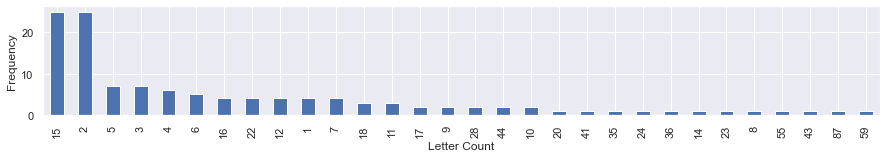

In [87]:
plt.figure(figsize=(15,2))
letter_count_value_counts=df['Letter Count'].value_counts()
top30_letter_count_value_counts=letter_count_value_counts.head(30)
top30_letter_count_value_counts.plot.bar()
plt.xlabel('Letter Count')
plt.ylabel('Frequency')

In [ ]:
When was the group most active?

Text(0, 0.5, 'Day of the Week')

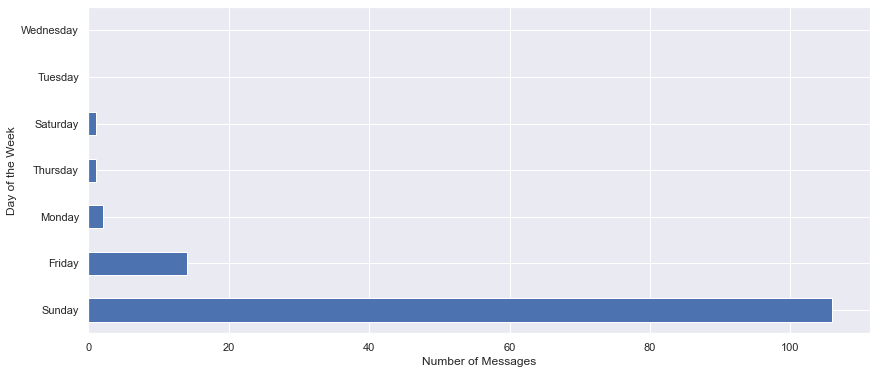

In [88]:
df['Day of Week'].value_counts().plot.barh()
plt.xlabel('Number of Messages')
plt.ylabel('Day of the Week')

In [ ]:
Any Particular dates?

Text(0, 0.5, 'Date')

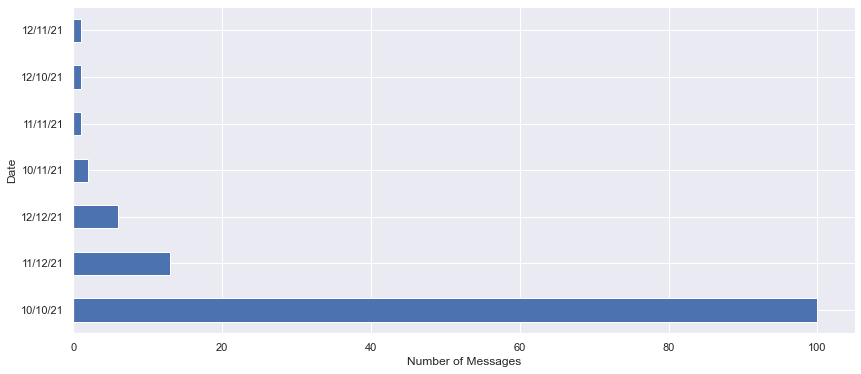

In [89]:
df['Date'].value_counts().head(10).plot.barh()
plt.xlabel('Number of Messages')
plt.ylabel('Date')

In [ ]:
The most active Hour

The most suitable time of day to get your message replied to

Text(0, 0.5, 'Hour')

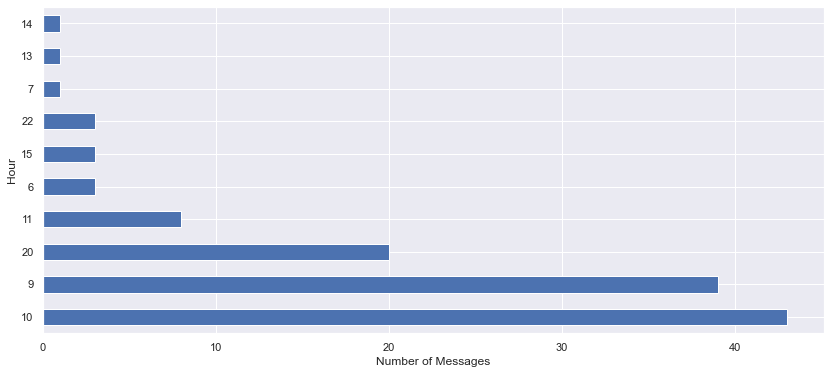

In [91]:
df['Hour'].value_counts().head(10).plot.barh() # Top 10 Times of the day at which the most number of messages sent
plt.xlabel('Number of Messages')
plt.ylabel('Hour')

In [ ]:
df['Hour']

Text(0, 0.5, 'Time')

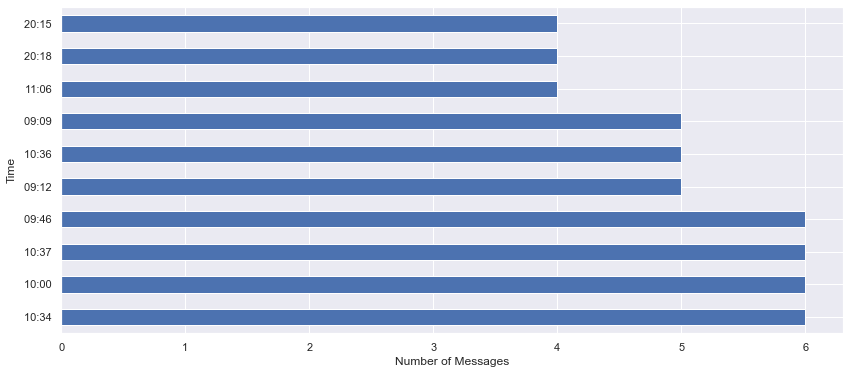

In [92]:
df['Time'].value_counts().head(10).plot.barh() # Top 10 Times of the day at which the most number of messages sent
plt.xlabel('Number of Messages')
plt.ylabel('Time')

In [ ]:
What are the most commonly used words?

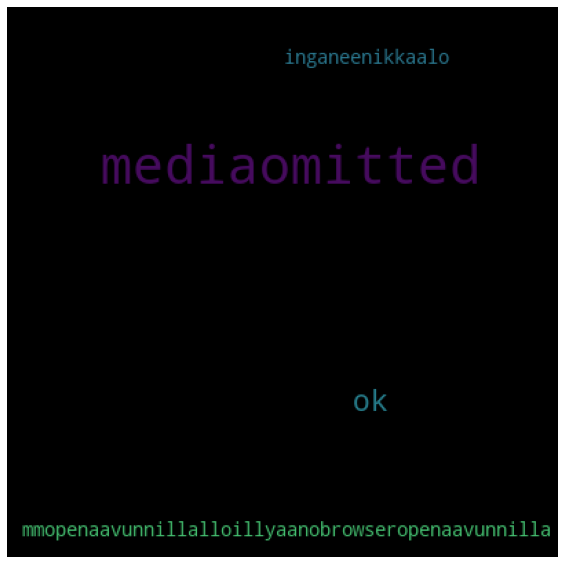

In [101]:
common_words=''
for val in df['Message'].values:
    val=str(val)
    tokens=val.split()
    
    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower()
    
    for words in tokens:
        common_words=common_words + words + ''
famcloud=WordCloud(width=400,height=400).generate(common_words)

plt.figure(figsize=(10,8))
plt.imshow(famcloud)
plt.axis('off')
plt.tight_layout()
plt.show()

In [104]:
df['Author'].unique()

array(['Nandha gect', 'Ayisha gect', 'Nivya gect', 'Sumayya gect',
       'Sajana gect', 'Niya gect', 'Varsha gect', 'Hari gect',
       'Suppu gect', 'Aneena gect', 'Jerin gect', 'Anjana gect',
       'Sreekiran gect', 'Shahma gect', 'Sreelakshmi gect', 'Sanika gect'],
      dtype=object)

In [ ]:
Find out the group's top 20 emoji usage

In [103]:
from collections import Counter
emojiGrpCtr=Counter()
emojis_list=map(lambda x: "".join(x.split()),emoji.UNICODE_EMOJI.keys())
r=re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx,row in df.iterrows():
    emojis_found=r.findall(row['Message'])
    for emoji_found in emojis_found:
        emojiGrpCtr[emoji_found]+=1
for item in emojiGrpCtr.most_common(20):
    print(item[0] + ' - '+str(item[1]))

it - 32
en - 8
de - 6
es - 5
fr - 1


In [105]:
emojiGrp=pd.DataFrame.from_dict(emojiGrpCtr,orient='index').reset_index()

In [106]:
emojiGrp=emojiGrp.rename(columns={'index':'Emoji',0:'Count'})

In [107]:
emojiGrp.head()

,Emoji,Count
0,it,32
1,en,8
2,es,5
3,de,6
4,fr,1
